In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = (20,10)

In [3]:
B = "Brand"

Audi = pd.read_csv("audi.csv")
Audi[B] = "Audi"

BMW = pd.read_csv("bmw.csv")
BMW[B] = "BMW"

Ford = pd.read_csv("ford.csv")
Ford[B] = "Ford"

Hyundi = pd.read_csv("hyundi.csv")
Hyundi[B] = "Hyundi"

Merc = pd.read_csv("merc.csv")
Merc[B] = "Merc"

Skoda = pd.read_csv("skoda.csv")
Skoda[B] = "Skoda"

Toyota = pd.read_csv("toyota.csv")
Toyota[B] = "Toyota"

Vouxhall = pd.read_csv("vauxhall.csv")
Vouxhall[B] = "Vouxhall"

VW = pd.read_csv("vw.csv")
VW[B] = "VW"

In [4]:
Hyundi

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize,Brand
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,Hyundi
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0,Hyundi
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7,Hyundi
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0,Hyundi
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0,Hyundi
...,...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6,Hyundi
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7,Hyundi
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0,Hyundi
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6,Hyundi


In [5]:
Hyundi['tax'] = Hyundi['tax(£)']
Hyundi.drop('tax(£)', axis = 1, inplace = True)
Hyundi.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,Brand,tax
0,I20,2017,7999,Manual,17307,Petrol,58.9,1.2,Hyundi,145
1,Tucson,2016,14499,Automatic,25233,Diesel,43.5,2.0,Hyundi,235
2,Tucson,2016,11399,Manual,37877,Diesel,61.7,1.7,Hyundi,30
3,I10,2016,6499,Manual,23789,Petrol,60.1,1.0,Hyundi,20
4,IX35,2015,10199,Manual,33177,Diesel,51.4,2.0,Hyundi,160


In [6]:
df = pd.concat([Audi, BMW, Ford, Hyundi, Merc, Skoda, Toyota, Vouxhall, VW], ignore_index = True)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
99182,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,VW
99183,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,VW
99184,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,VW
99185,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,VW


In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [8]:
df=df[df.engineSize>=1]
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,98907.000000,98907.000000,98907.000000,98907.000000,98907.000000,98907.000000
mean,2017.087992,16804.795424,23063.969325,120.328996,54.991043,1.667947
std,2.118588,9868.154744,21157.264002,63.117157,13.662626,0.551463
min,1970.000000,450.000000,1.000000,0.000000,0.300000,1.000000
25%,2016.000000,9999.000000,7423.500000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17454.000000,145.000000,54.300000,1.600000
75%,2019.000000,20875.000000,32346.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [9]:
df=df[(df.year>2002)&(df.year<2022)]
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000
mean,2017.101299,16815.107077,23022.215115,120.201263,55.009213,1.667373
std,2.056306,9864.920868,21094.925319,62.949351,13.652011,0.550475
min,2003.000000,450.000000,1.000000,0.000000,0.300000,1.000000
25%,2016.000000,10000.000000,7416.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17441.000000,145.000000,54.300000,1.600000
75%,2019.000000,20880.000000,32304.750000,145.000000,62.800000,2.000000
max,2020.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [10]:
df=df[(df.mpg>=18)&(df.mpg<=404)] #Highest MPG via internet search was 403 mpg
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,98789.000000,98789.000000,98789.000000,98789.000000,98789.000000,98789.000000
mean,2017.100598,16808.665327,23027.244086,120.181751,55.023276,1.667247
std,2.055650,9856.291272,21089.431246,62.939865,13.556389,0.550419
min,2003.000000,450.000000,1.000000,0.000000,19.000000,1.000000
25%,2016.000000,10000.000000,7424.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17448.000000,145.000000,54.300000,1.600000
75%,2019.000000,20875.000000,32313.000000,145.000000,62.800000,2.000000
max,2020.000000,159999.000000,323000.000000,580.000000,256.800000,6.600000


In [11]:
df=df[(df.mileage>=100)&(df.mileage<=130000)] 
#Lowest reasonable mileage is 100, highest reasonable mileage for dataset is 130,000 (all higher count values are <20)
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,96206.000000,96206.000000,96206.000000,96206.000000,96206.000000,96206.000000
mean,2017.054487,16638.029073,23405.519780,119.506736,55.172767,1.665762
std,2.029578,9742.781667,20385.436963,63.428635,13.525659,0.549879
min,2003.000000,450.000000,100.000000,0.000000,19.000000,1.000000
25%,2016.000000,9998.000000,8089.000000,125.000000,47.100000,1.200000
50%,2017.000000,14270.000000,18000.000000,145.000000,54.300000,1.600000
75%,2019.000000,20495.000000,32725.750000,145.000000,62.800000,2.000000
max,2020.000000,159999.000000,130000.000000,580.000000,256.800000,6.600000


In [12]:
df[df.fuelType!='Hybrid']
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,96206.000000,96206.000000,96206.000000,96206.000000,96206.000000,96206.000000
mean,2017.054487,16638.029073,23405.519780,119.506736,55.172767,1.665762
std,2.029578,9742.781667,20385.436963,63.428635,13.525659,0.549879
min,2003.000000,450.000000,100.000000,0.000000,19.000000,1.000000
25%,2016.000000,9998.000000,8089.000000,125.000000,47.100000,1.200000
50%,2017.000000,14270.000000,18000.000000,145.000000,54.300000,1.600000
75%,2019.000000,20495.000000,32725.750000,145.000000,62.800000,2.000000
max,2020.000000,159999.000000,130000.000000,580.000000,256.800000,6.600000


In [13]:
df['year_adj'] = 2021 - df['year']
var_list = ['model','year_adj','transmission','mileage','fuelType','mpg','tax','engineSize']
x1 = df[var_list]
x2 = sm.add_constant(x1)
x3 = pd.get_dummies(x2)
y = np.log10(df['price'])
df['LogOfPrice'] = y

regression_model = sm.OLS(y, x3).fit()
df['PredictedPrice'] = regression_model.predict(x3)
print(x3)
regression_model.summary()

       const  year_adj  mileage   mpg  tax  engineSize  model_ 1 Series  \
0        1.0         4    15735  55.4  150         1.4                0   
1        1.0         5    36203  64.2   20         2.0                0   
2        1.0         5    29946  55.4   30         1.4                0   
3        1.0         4    25952  67.3  145         2.0                0   
4        1.0         2     1998  49.6  145         1.0                0   
...      ...       ...      ...   ...  ...         ...              ...   
99182    1.0         9    74000  58.9  125         2.0                0   
99183    1.0        13    88102  46.3  145         1.2                0   
99184    1.0        12    70000  42.0  200         1.4                0   
99185    1.0        15    82704  46.3  150         1.2                0   
99186    1.0        14    74000  46.3  145         1.2                0   

       model_ 2 Series  model_ 3 Series  model_ 4 Series  ...  model_220  \
0                    0 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     8138.
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:20:37   Log-Likelihood:             1.4437e+05
No. Observations:               96206   AIC:                        -2.883e+05
Df Residuals:                   96004   BIC:                        -2.864e+05
Df Model:                         201                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            2.9915      0.006    469.819      0.000       2.979       3.004
year_adj                        -0.0448      0.000   -324.919      0.000      -0.045      -0.045
mileage                      -2.393e-06   1.38e-08   -174.015      0.000   -2.42e-06   -2.37e-06
mpg                             -0.0006   2.29e-05    -26.311      0.000      -0.001      -0.001
tax                          -7.368e-05   3.55e-06    -20.781      0.000   -8.06e-05   -6.67e-05
engineSize                       0.1062      0.001    159.247      0.000       0.105       0.108
model_ 1 Series                 -0.0116      0.002     -6.702      0.000      -0.015      -0.008
model_ 2 Series                  0.0012      0.002      0.613      0.540      -0.003       0.005
model_ 3 Series                  0.0387      0.002     23.256      0.000       0.035       0.042
model_ 4 Series                  0.0477      0.002     22.050      0.000       0.043       0.052
model_ 5 Series                  0.0749      0.002     35.370      0.000       0.071       0.079
model_ 6 Series                  0.0837      0.005     15.257      0.000       0.073       0.094
model_ 7 Series                  0.1499      0.005     27.623      0.000       0.139       0.161
model_ 8 Series                  0.2615      0.009     28.797      0.000       0.244       0.279
model_ A Class                   0.0460      0.002     27.790      0.000       0.043       0.049
model_ A1                       -0.0005      0.002     -0.266      0.790      -0.004       0.003
model_ A2                        0.0811      0.054      1.509      0.131      -0.024       0.186
model_ A3                        0.0492      0.002     28.074      0.000       0.046       0.053
model_ A4                        0.0596      0.002     31.261      0.000       0.056       0.063
model_ A5                        0.0919      0.002     41.430      0.000       0.088       0.096
model_ A6                        0.1088      0.002     46.479      0.000       0.104       0.113
model_ A7                        0.1092      0.005     21.298      0.000       0.099       0.119
model_ A8                        0.1319      0.005     25.469      0.000       0.122       0.142
model_ Adam                     -0.2261      0.003    -78.300      0.000      -0.232      -0.220
model_ Agila                    -0.2852      0.012    -24.696      0.000      -0.308      -0.263
model_ Amarok                    0.0762      0.005     14.300      0.000       0.066       0.087
model_ Amica                    -0.3983      0.054     -7.409      0.000      -0.504      -0.293
model_ Ampera                    0.1099      0.066      1.666      0.096      -0.019       0.239
model_ Antara                   -0.1478      0.010    -14.169      0.000    

In [14]:
correlation = df.corr()
correlation

,year,price,mileage,tax,mpg,engineSize,year_adj,LogOfPrice,PredictedPrice
year,1.000000,0.496790,-0.744510,0.220239,-0.164742,-0.031132,-1.000000,0.623291,0.641322
price,0.496790,1.000000,-0.413672,0.314099,-0.353875,0.651311,-0.496790,0.918231,0.889314
mileage,-0.744510,-0.413672,1.000000,-0.232927,0.221829,0.109632,0.744510,-0.497636,-0.512032
tax,0.220239,0.314099,-0.232927,1.000000,-0.520435,0.281640,-0.220239,0.338556,0.348350
mpg,-0.164742,-0.353875,0.221829,-0.520435,1.000000,-0.260556,0.164742,-0.302822,-0.311583
engineSize,-0.031132,0.651311,0.109632,0.281640,-0.260556,1.000000,0.031132,0.597344,0.614624
year_adj,-1.000000,-0.496790,0.744510,-0.220239,0.164742,0.031132,1.000000,-0.623291,-0.641322
LogOfPrice,0.623291,0.918231,-0.497636,0.338556,-0.302822,0.597344,-0.623291,1.000000,0.971885
PredictedPrice,0.641322,0.889314,-0.512032,0.348350,-0.311583,0.614624,-0.641322,0.971885,1.000000


<AxesSubplot:>

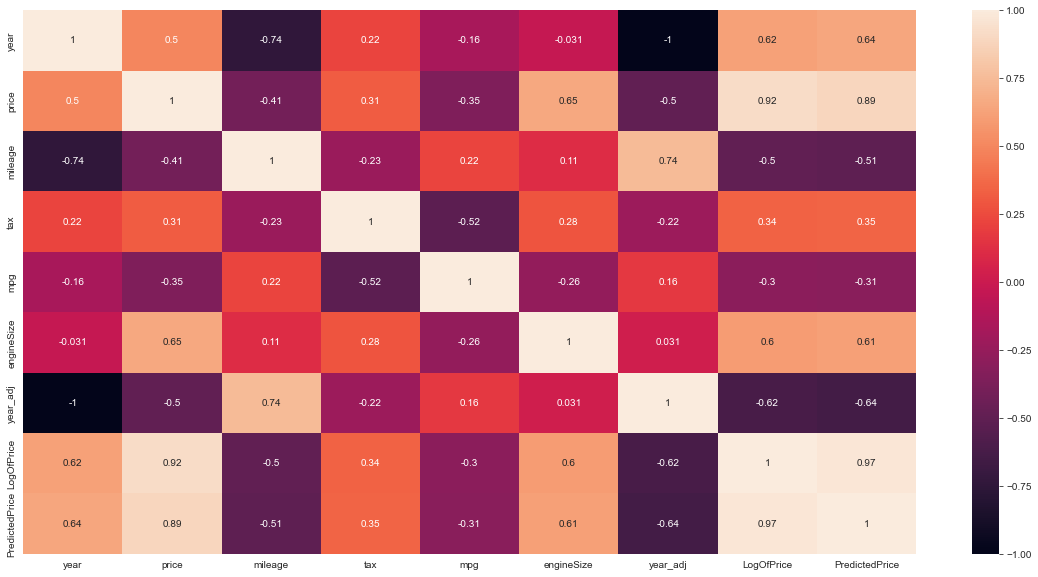

In [15]:
sns.heatmap(correlation, annot = True)

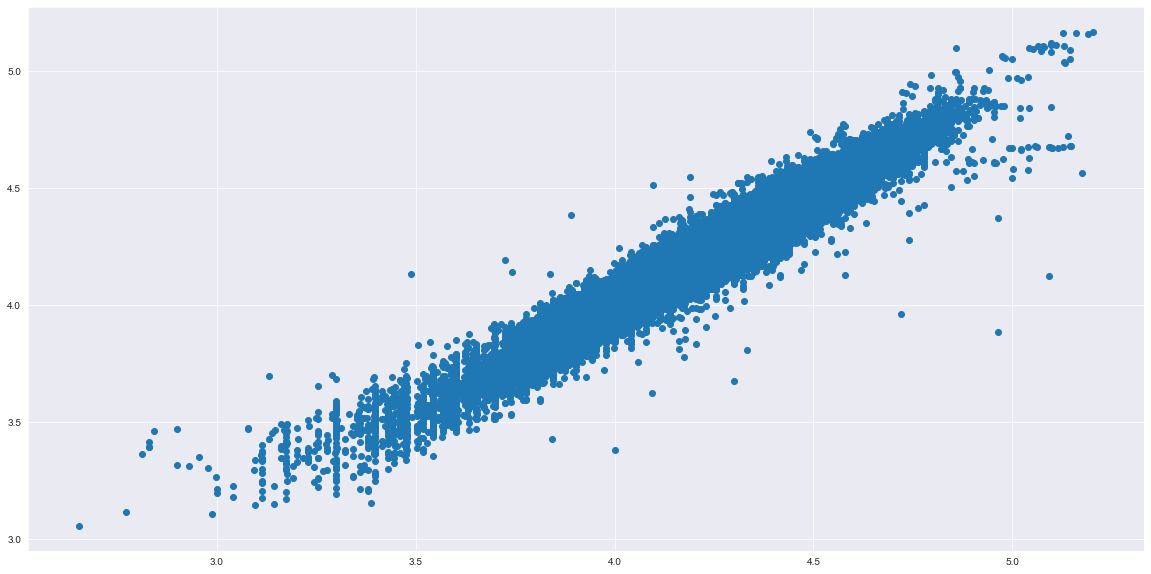

In [16]:
plt.scatter(y, df['PredictedPrice'])
plt.show()

(5000.0, 175000.0)

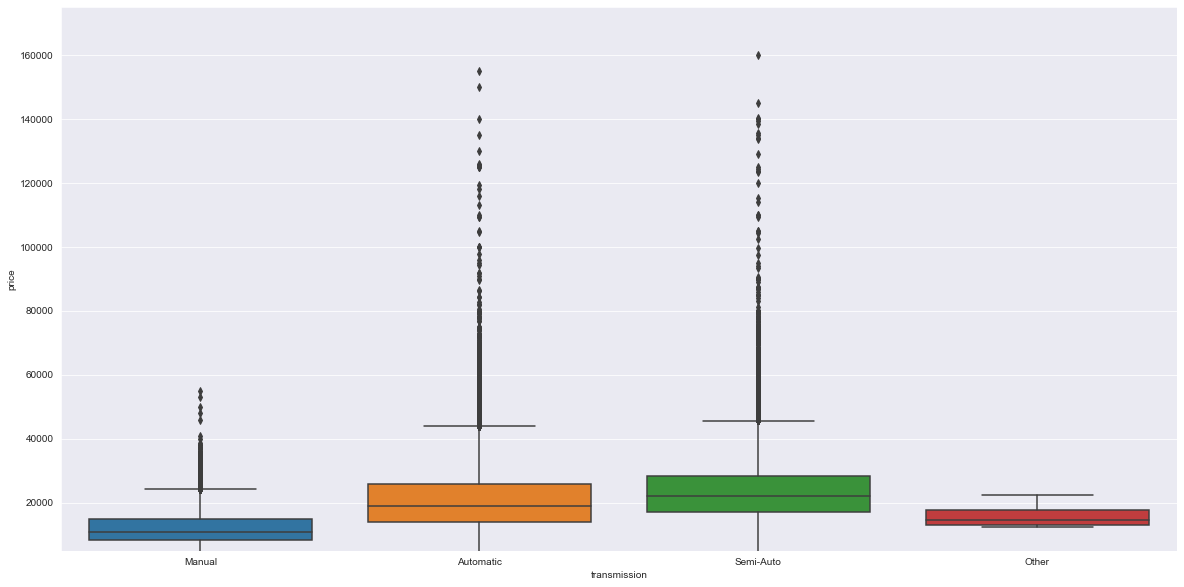

In [17]:
sns.boxplot(x='transmission', y='price', data = df)
plt.ylim(5000,175000)

<AxesSubplot:xlabel='fuelType', ylabel='price'>

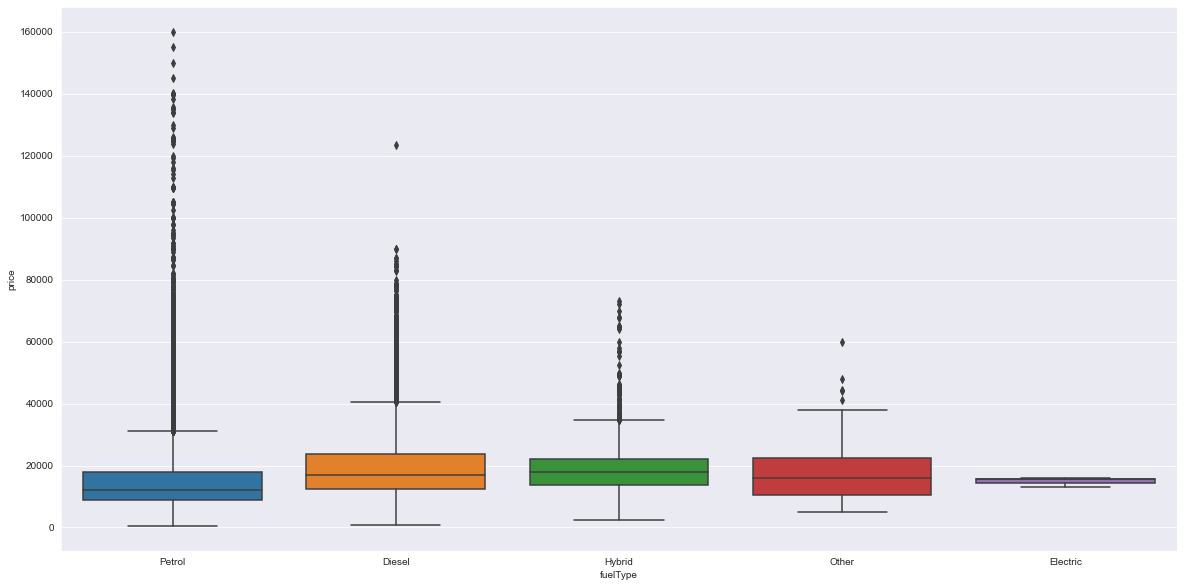

In [18]:
sns.boxplot(x='fuelType', y='price', data = df)

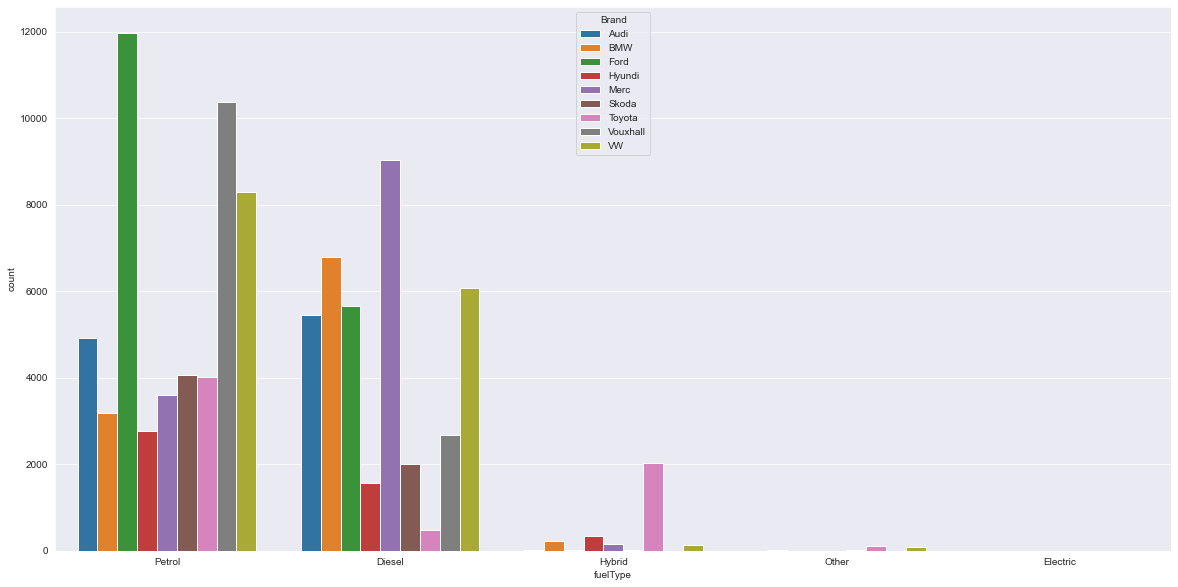

In [19]:
cars_by_fuelType = (sns.countplot(x='fuelType',y=None,hue='Brand',data = df))
plt.show(cars_by_fuelType)

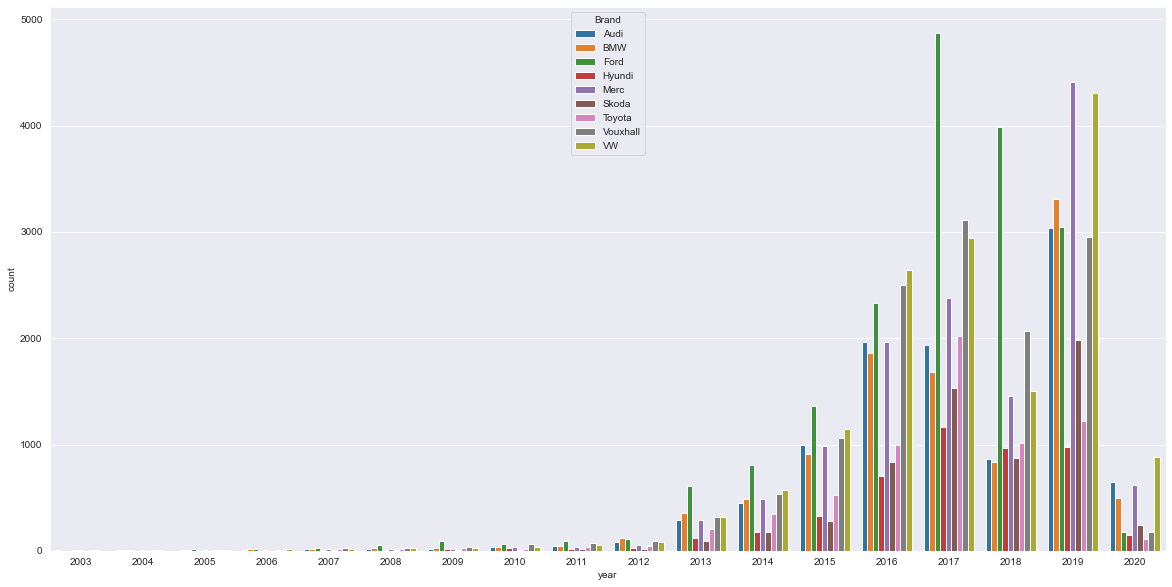

In [20]:
cars_by_year = (sns.countplot(x='year',y=None,hue='Brand',data = df))
plt.show(cars_by_year)

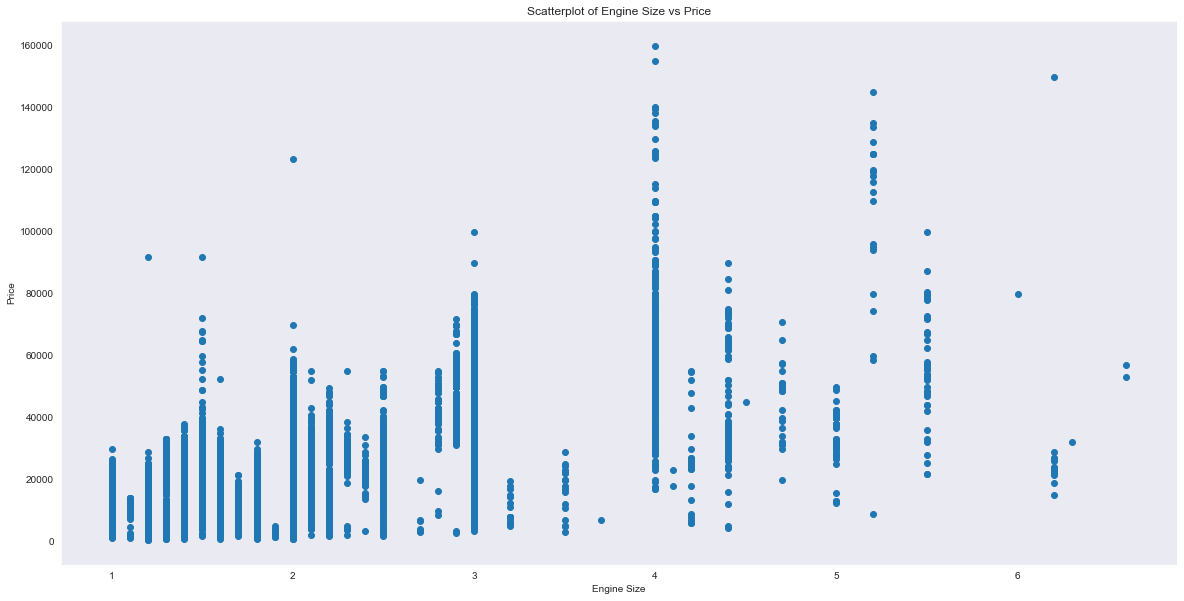

In [21]:
plt.scatter(df['engineSize'], df['price'])
plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.grid()
plt.show()

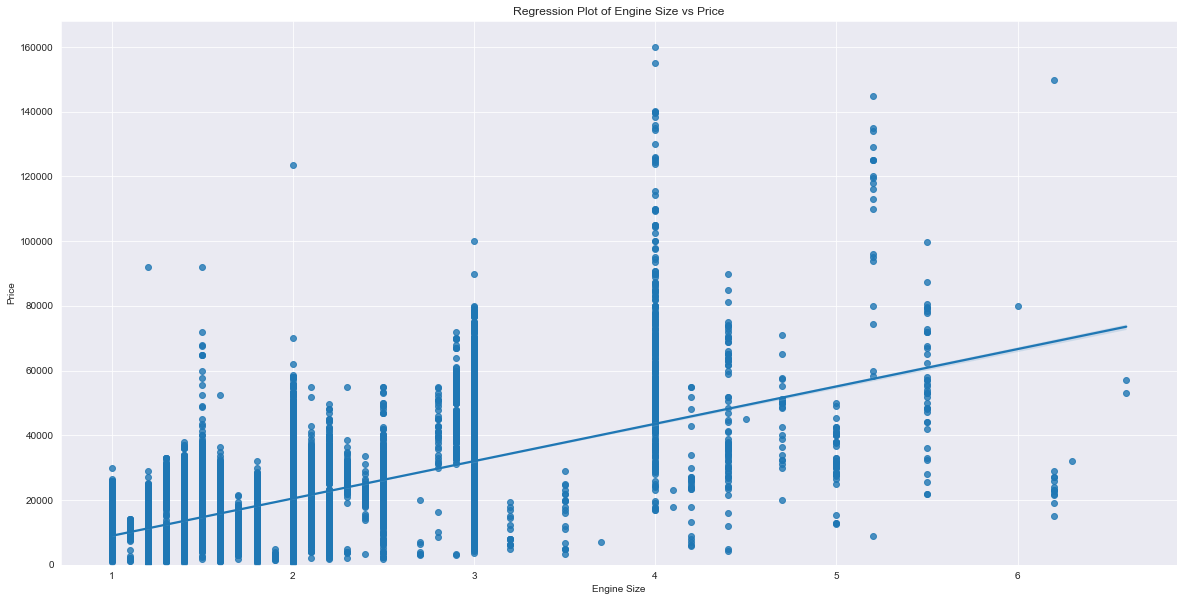

In [22]:
sns.regplot(x ='engineSize', y ='price', data = df)
plt.title('Regression Plot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.ylim(0, )
plt.show()

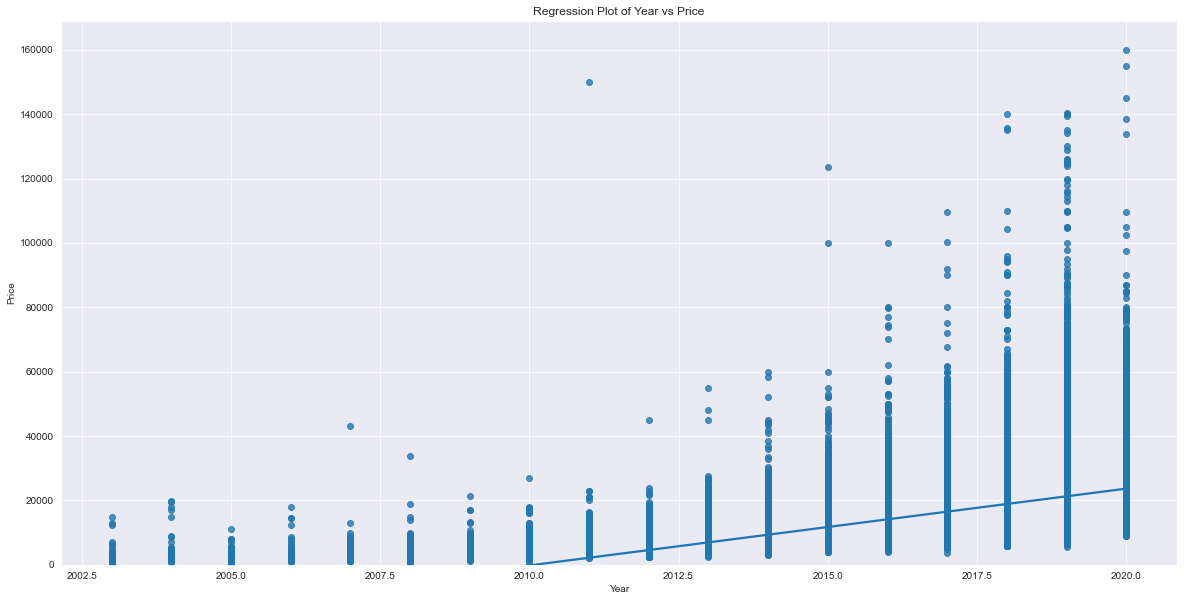

In [23]:
sns.regplot(x ='year', y ='price', data = df)
plt.title('Regression Plot of Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.ylim(0, )
plt.show()

In [26]:
df.to_csv('df.csv')

In [25]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand,year_adj,LogOfPrice,PredictedPrice
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi,4,4.096910,4.163983
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi,5,4.217484,4.266553
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi,5,4.041393,4.093970
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi,4,4.225309,4.275647
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi,2,4.238046,4.297635
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,VW,9,3.777427,3.828545
99183,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,VW,13,3.255031,3.223603
99184,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,VW,12,3.201397,3.331559
99185,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,VW,15,3.096910,3.146457
